In [1]:
import tripy as trp
%matplotlib inline

# Load Model

- The models are located in /home/triphase/models folder in the target pc. 
- The syntax looks like this:   

```Python

short_name_of_the_model = trp.Model(model = 'model_name', user = 'user_name', host = 'target_ip')

```

```Python

    - 'user_name' is the name of the folder on the target pc in /home/triphase/models (can be found using winSCP or Putty)
    - 'model_name' is the modeled which have been generated by Simulink and deploy to the target pc and can be found in               (/home/triphase/models/'user_name')

```




In [2]:
#help(trp.Model)

In [3]:
#load the model
m = trp.Model(model = 'PM15A30I60F06_afAC3_vsAC3_csDC1', user = 'triphase', host = '127.0.0.1')

Select(description='Select one of the available Triphase realtime targets: ', options={'3p-han-1': '172.22.151…

In [7]:
# Start the model

m.start()

#Stop the model

#m.stop()

# Model Signals and Model Parameters

In [8]:
# print the list of signal that can be monitored
m.select_signal()

In [9]:
# print the list of paramters that can be used.
m.select_parameter()

#### Capturing data

In [10]:
#capture a single signal
u_dcbus = m.get_signal('af/u_dcbus')
u_dcbus

{'af/u_dcbus': 7.873535}

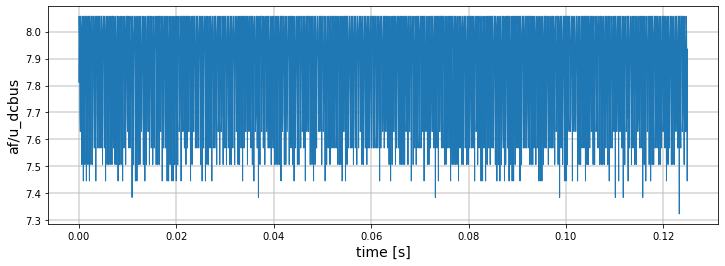

In [11]:
# capture 2000 data point and plot
u_dcbus = m.capture_data('af/u_dcbus', samples = 2000, decimation = 1)
u_dcbus.plot()

##### Parameters switching

    - An examaple is shown below:
        - 1st the external command need to be switched on.
        - 2nd Switch on the pre charge DC link.
        - Enale the Af.
        - Connect the transfomer.
        - Enable the current source.
        - Change SP to charge or discharge the battery.

In [12]:
# Enable the external command
m.set_parameter('COMMAND_CENTER/External_param', 1)

The parameter: COMMAND_CENTER/External_param is set to 1.0.


In [13]:
# switch on the pre charge 
m.set_parameter('syst/precharge_P30_1', 1)

The parameter: syst/precharge_P30_1 is set to 1.0.


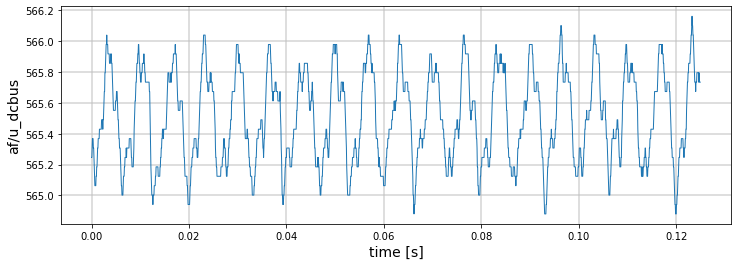

In [14]:
# check the DC bus voltage, it should be around 570 V 
u_dcbus = m.capture_data('af/u_dcbus', samples = 2000, decimation = 1)
u_dcbus.plot()

In [15]:
# enable the Af
m.set_parameter('af/enable', 1)

The parameter: af/enable is set to 1.0.


##### The pre charge can be switched off after the af has been connected

In [16]:
# The switch off the pre charge 
m.set_parameter('syst/precharge_P30_1', 0)

The parameter: syst/precharge_P30_1 is set to 0.0.


{'af/connected': 1.0}


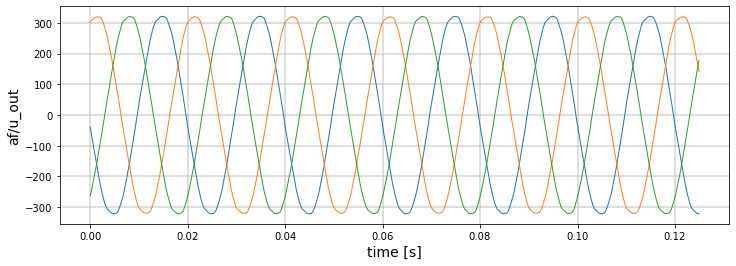

In [17]:
# capture output of Af
#capture a single signal
connect = m.get_signal('af/connected')
print(connect)
capture_data = m.capture_data('af/u_out', samples = 2000, decimation = 1)
capture_data.plot()

In [18]:
# connect the transfomer
m.set_parameter('transfo/connect', 1)

The parameter: transfo/connect is set to 1.0.


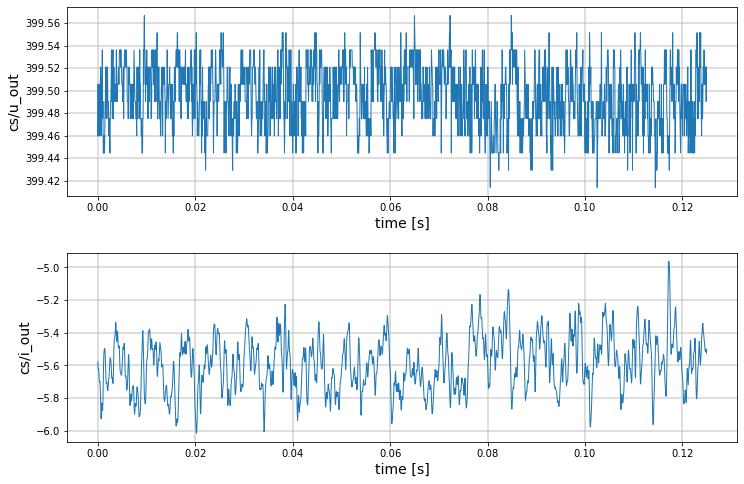

In [27]:
# capture output cs i and u out
cs_out = m.capture_data(['cs/u_out','cs/i_out'], samples = 2000, decimation = 1)
cs_out.plot()

In [20]:
# connect the cs
m.set_parameter('cs/enable', 1)

The parameter: cs/enable is set to 1.0.


# Important !!!!!

## Change the SP with small step and the setpoint value should smaller than 10 !!! 

    - Postive value: charge the battery.
    - Negative value: discharge from the battery.

In [21]:
# Change the current Set point
#m.set_parameter('cs/i_lim', 2)
#m.set_parameter('cs/Gp', 0)

In [22]:
#capture a single signal
#clipping = m.get_signal('cs/clipping')
#clipping

In [25]:
# Change the current Set point
m.set_parameter('cs/i_ph', 5)

The parameter: cs/i_ph is set to 5.0.


### Plot a snapshot.

 - The plot show negative: charge the battery.
 - The plot show positive: discharge the battery.

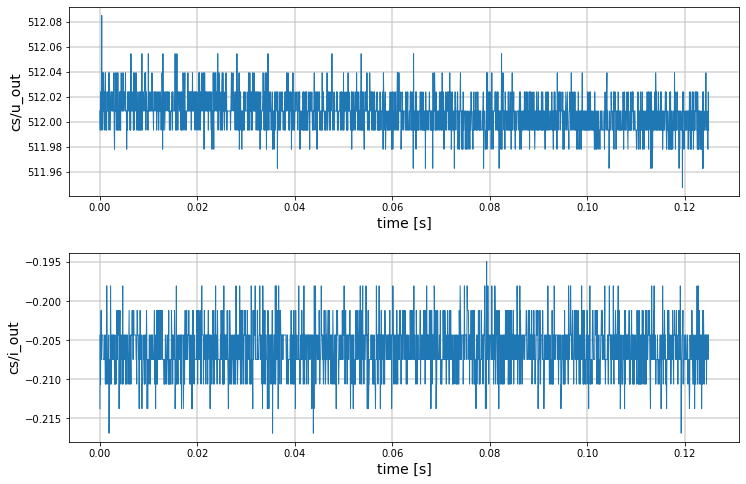

In [50]:
# capture output cs i and u out
cs_out = m.capture_data(['cs/u_out','cs/i_out'], samples = 2000, decimation = 1)
cs_out.plot()

# Turn off the system

- Follwing the step below:
        - Change the current SP back to 0.
        - Disconnect the cs.
        - Disconnect the transfomer.
        - Disable the Af.
        - Stop the model


In [32]:
# change the current SP back to 0
m.set_parameter('cs/i_ph', 0)

The parameter: cs/i_ph is set to 0.0.


In [33]:
# Disconnect the cs
m.set_parameter('cs/enable', 0)

The parameter: cs/enable is set to 0.0.


In [39]:
# Disconnect the transfomer
m.set_parameter('transfo/connect', 0)

The parameter: transfo/connect is set to 0.0.


In [40]:
# Disable the Af
m.set_parameter('af/enable', 0)

The parameter: af/enable is set to 0.0.


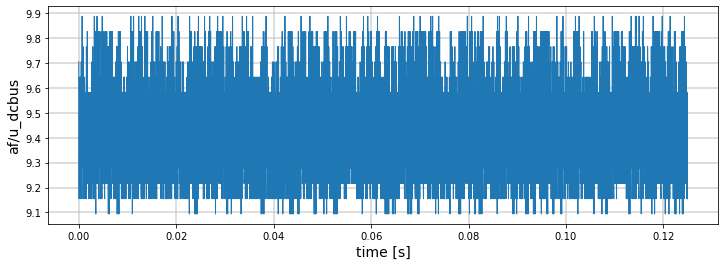

In [42]:
# check the DC bus voltage, it should be around 10 V 

u_dcbus = m.capture_data('af/u_dcbus', samples = 2000, decimation = 1)
u_dcbus.plot()

In [43]:
# Disable external command
m.set_parameter('COMMAND_CENTER/External_param', 0)

The parameter: COMMAND_CENTER/External_param is set to 0.0.


In [11]:
#Stop the model
m.stop()

The model: PM15A30I60F06_afAC3_vsAC3_csDC1 has stopped.


# Error Ack and Error check

In [55]:
#error_XC = m.get_signal('syst/error_XC')
#error_XC
#error_s   = m.get_signal('syst/error_code_S')
#error_s

In [56]:
#set a single parameter
#m.set_parameter('syst/error_ack', 1)
#m.set_parameter('syst/error_ack', 0)

In [57]:
help(m.set_parameter)

Help on method set_parameter in module tripy.model:

set_parameter(parameters='', values=0.0) method of tripy.model.Model instance
    Set parameter(s) value on a running model. Checks parameter and value integrity.

